# <center>Feature engineering : étude de cas</center>
<center>Prédiction de prix de voitures</center>

*Objectifs* : 

Ce TP a pour but de mettre en oeuvre les méthodes relatives au feature engineering présentées en cours afin d'améliorer la prédiction du prix d'une voiture. Plus particulièrement :
- Identifier le type de chaque variable (quantitative/ordinale/catégorielle) et les transformer de façon adéquate (one hot encoding, standardisation, ...).
- Etudier les relations entre variables pour ajouter de nouvelles features.
- Comprendre la nature des features pour en ajouter de nouvelles.
- Mettre en évidence la pertinence de ces manipulations.

Dans cette séance, les librairies suivantes seront utilisées : installez-les si nécessaire et chargez-les

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
import time

## Table des matières

<p><div class="lev1"><a href="#1-Jeu-de-données-:-présentation-et-analyse"><span class="toc-item-num">1 - </span>Jeu de données : présentation et analyse</a></div>
<p><div class="lev1"><a href="#2-Transformations-essentielles"><span class="toc-item-num">2 - </span>Transformations essentielles</a></div>
<p><div class="lev2"><a href="#2-1-One-hot-encoding"><span class="toc-item-num">2-1 </span>One-hot encoding</a></div>
<p><div class="lev2"><a href="#2-2-Mise-à-l'échelle"><span class="toc-item-num"> 2-2 </span>Mise à l'échelle</a></div>
<p><div class="lev2"><a href="#2-3-Résultat-de-référence"><span class="toc-item-num"> 2-3 </span>Résultat de référence</a></div>
<p><div class="lev2"><a href="#2-4-One-hot-encoding-vs-label-encoding"><span class="toc-item-num"> 2-4 </span>One-hot encoding vs label encoding</a></div>
<p><div class="lev2"><a href="#2-5-Oubli-de-mise-à-l'échelle"><span class="toc-item-num"> 2-5 </span>Oubli de mise à l'échelle</a></div>
<p><div class="lev2"><a href="#2-6-Sur-les-données-non-standardisées-et-mal-encodées"><span class="toc-item-num"> 2-6 </span>Sur les données non standardisées et mal encodées</a></div>
<p><div class="lev1"><a href="#3-Création-de-features"><span class="toc-item-num">3 </span>Création de features</a></div>
<p><div class="lev1"><a href="#3-1-Le-cas-de-la-variable-'Year'"><span class="toc-item-num"> 2-1 </span>Le cas de la variable 'Year'</a></div>
<p><div class="lev2"><a href="#3-2-Le-cas-de-la-variable-'highway-MPG'-:-première-approche"><span class="toc-item-num"> 3-2 </span>Le cas de la variable 'highway MPG' : première approche</a></div>
<p><div class="lev2"><a href="#3-3-Terme-d'interaction"><span class="toc-item-num"> 3-3 </span>Terme d'interaction</a></div>
<p><div class="lev2"><a href="#3-4-Encore-des-transformations-..."><span class="toc-item-num"> 3-4 </span>Encore des transformations ...</a></div>
<p><div class="lev1"><a href="#4-Et-les-variables-catégorielles-?"><span class="toc-item-num"> 4 </span>Et les variables catégorielles ?</a></div>
<p><div class="lev2"><a href="#4-1-Sont-elles-toutes-déterminantes-?"><span class="toc-item-num"> 4-1 </span>Sont-elles toutes déterminantes ?</a></div>
<p><div class="lev1"><a href="#5-OneHotEncoder-vs-get_dummies"><span class="toc-item-num"> 5 </span>OneHotEncoder vs get_dummies</a></div>

## 1 Jeu de données : présentation et analyse

Cette séance est inspirée de [ce travail](https://www.kaggle.com/anirbank/usedcarpriceprediction) et de [celui-ci](https://www.kaggle.com/bryanb/simple-and-quick-eda) et étudie le jeu de données disponible sur [Kaggle](https://www.kaggle.com/CooperUnion/cardataset). Il contient $11902$ observations de $14$ features présentées dans le tableau ci-dessous. Il s'agit de pouvoir prédire le prix de voitures à partir de certaines de leur caractéristiques.


|Nom  |Description|Valeurs|
|-----|-----------|--------------------|
|Make  | marque | {BMW, FIAT, Mercedes-Benz, Chrysler, Nissan, Volvo,|
|   | |    Mazda, Mitsubishi, Ferrari, Alfa Romeo, Toyota,|
|   | |         McLaren, Maybach, Pontiac, Porsche, Saab, Audi, GMC,|
|   | |       Hyundai, Plymouth, Honda, Oldsmobile, Suzuki, Ford,|
|   | |       Cadillac, Kia, Bentley, Chevrolet, Dodge, Lamborghini,|
|   | |       Lincoln, Subaru, Volkswagen, Spyker, Buick, Acura,|
|   | |       Rolls-Royce, Maserati, Lexus, Aston Martin, Land Rover,|
|   | |       Lotus, Infiniti, Scion, Genesis, HUMMER, Tesla,|
|   | |       Bugatti}||
|Year| année de fabrication  |$\mathbb{N}$|
|Engine Fuel Type| type de carburant |  {0 : 'unleaded', 1 : 'flex-fuel', 2 : 'diesel',|
| |  | 3 : 'electric',4 : 'natural gas'} |
|Engine HP| puissance du moteur (hp) | $\mathbb{R}$|
|Engine Cylinders | nombre de cylindre |$\mathbb{N}$|
|Transmission Type | type de transmission |'MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
 |   | |      'UNKNOWN'|
|Driven_Wheels| roues motrices |{rear wheel drive, all wheel drive, front wheel drive,four wheel drive}|
|Number of Doors| nombre de portes | $\mathbb{N}$|
|Vehicle Size| taille du véhicule | {Compact, Midsize, Large}|
|highway MPG| consommation sur route (en mpg)| $\mathbb{R}$|
|city mpg| consommation en ville (en mpg) |  $\mathbb{R}$|
|Popularity| popularité (via twitter) | $\mathbb{R}$|
|MSRP| prix (en \\$) | $\mathbb{R}$|

><u>Tâche 1</u>. Importez et visualisez les données se trouvant dans le fichier *data_cars.csv* fourni. Vous pouvez utiliser pour cela les méthodes suivantes, se trouvant dans la librairie <u>pandas</u> :
>- <span style="border:1px; border-style:solid">read_csv</span> 
>- <span style="border:1px; border-style:solid">head</span> 
>- <span style="border:1px; border-style:solid">describe</span>, en particulier, vous pouvez donner à cette fonction le paramètre suivant : *include = 'object'* ou *include = 'int64'* ou *include = 'float64'*,etc ... pour isoler un certain groupe de features.
>
>ainsi que les attributs :
>- <span style="border:1px; border-style:solid">dtypes</span> 
>- <span style="border:1px; border-style:solid">shape</span>
>
> Assurez-vous que le nombre d'observations et de variables correspond bien à ce qui vous a été annoncé en introduction.
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

In [3]:
data = pd.read_csv('data_cars.csv',index_col=0)
data.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,0,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,0,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,0,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,0,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,0,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [4]:
data.shape

(11902, 14)

In [5]:
data.isna().sum().sum()

0

In [6]:
data.dtypes

Make                  object
Year                   int64
Engine Fuel Type       int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
data.describe(include='object')

,Make,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11902,11902,11902,11902,11902
unique,48,5,4,3,16
top,Chevrolet,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1123,8261,4787,4752,3048


In [8]:
data.describe(include='int64')

,Year,Engine Fuel Type,highway MPG,city mpg,Popularity,MSRP
count,11902.000000,11902.000000,11902.000000,11902.000000,11902.000000,1.190200e+04
mean,2010.397832,0.126197,26.644850,19.738615,1555.278441,4.061092e+04
std,7.571463,0.414068,8.863755,8.990560,1442.285873,6.013677e+04
min,1990.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,0.000000,22.000000,16.000000,549.000000,2.101750e+04
50%,2015.000000,0.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,0.000000,30.000000,22.000000,2009.000000,4.226500e+04
max,2017.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
data.describe(include='float64')

,Engine HP,Engine Cylinders,Number of Doors
count,11902.000000,11902.000000,11902.000000
mean,249.397363,5.616955,3.438162
std,108.916386,1.792268,0.880947
min,55.000000,0.000000,2.000000
25%,170.000000,4.000000,2.000000
50%,227.000000,6.000000,4.000000
75%,300.000000,6.000000,4.000000
max,1001.000000,16.000000,5.000000


><u>Tâche 2</u>. Repérer la feature qui est de type 'int64' mais qu'il serait plus logique de transformer en 'object' car c'est une variable catégorielle.
>
> Effectuez cette transformation à l'aide du code proposé ci-dessous.

In [10]:
#mettre au bon format
mapping_fuel = {
        0 : 'unleaded',
        1 : 'flex-fuel',
        2 : 'diesel',
        3 : 'electric',
        4 : 'natural gas'
}
data['Engine Fuel Type']=data['Engine Fuel Type'].replace(mapping_fuel)

In [11]:
data.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,2011,unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,2011,unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,2011,unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,2011,unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,2011,unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


><u>Tâche 3</u>. Quelles sont les données :
>- quantitatives ? 
>- catégorielles ? 
>- ordinales ? 
>
> Compléter les listes suivantes.

In [12]:
list_q=['Year','highway MPG','city mpg','Engine HP', 'Engine Cylinders','Number of Doors','Popularity']#variables quantitatives sans la variable à prédire 'price' 
list_c=['Make','Transmission Type','Driven_Wheels','Vehicle Style','Engine Fuel Type']#variables catégorielles
list_o=['Vehicle Size']#variables ordinales

><u>Tâche 4</u>. Labelliser la variable ordinale à l'aide du code ci-dessous :

In [13]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [14]:
#mettre au bon format
mapping_ordinal = {
        'Compact': 0,
        'Midsize' : 1,
        'Large': 2
}
data['Vehicle Size']=data['Vehicle Size'].replace(mapping_ordinal)

In [15]:
data['Vehicle Size'].dtypes

dtype('int64')

In [16]:
data.dtypes

Make                  object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size           int64
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

><u> Tâche 5</u>. Visualiser les gammes de prix des différentes marques de véhicule à l'aide de la fonction <span style="border:1px; border-style:solid">boxplot</span> de la librairie <u>seaborn</u>.

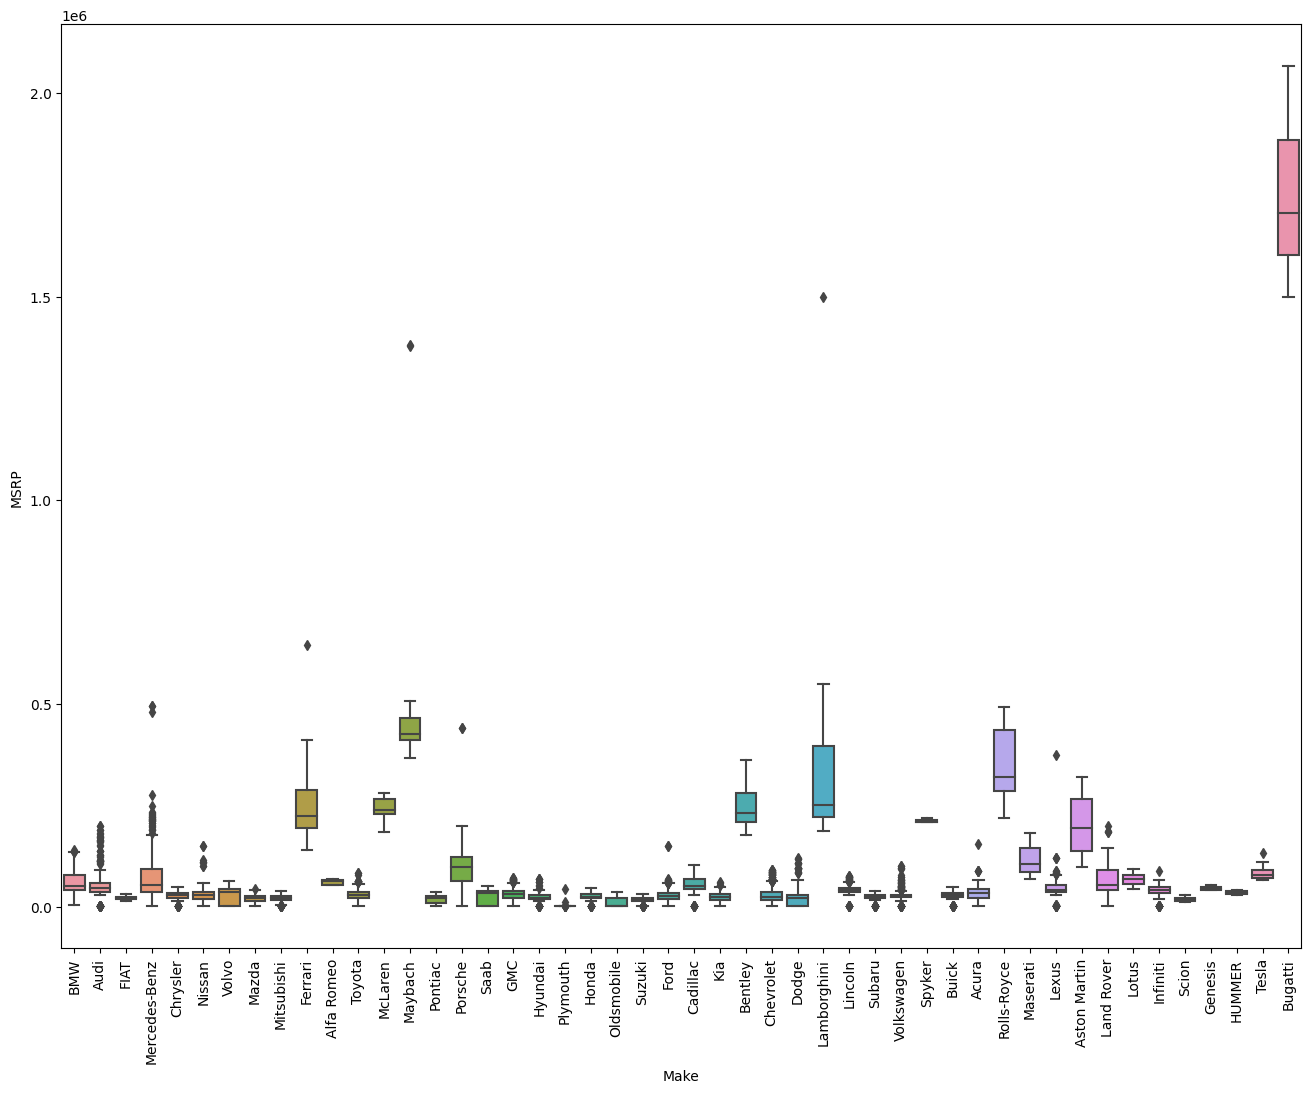

In [17]:
plt.figure(figsize=(16, 12))
ax = sns.boxplot(x='Make', y='MSRP', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

<u> Tâche 6</u>. Il apparaît que ce jeu de données renferme des marques aux gammes de prix très hétérogènes. Visualiser le prix médian de chaque marque à l'aide de la fonction <span style="border:1px; border-style:solid">groupby</span> de la librairie <u>pandas</u>.

<AxesSubplot:xlabel='Make'>

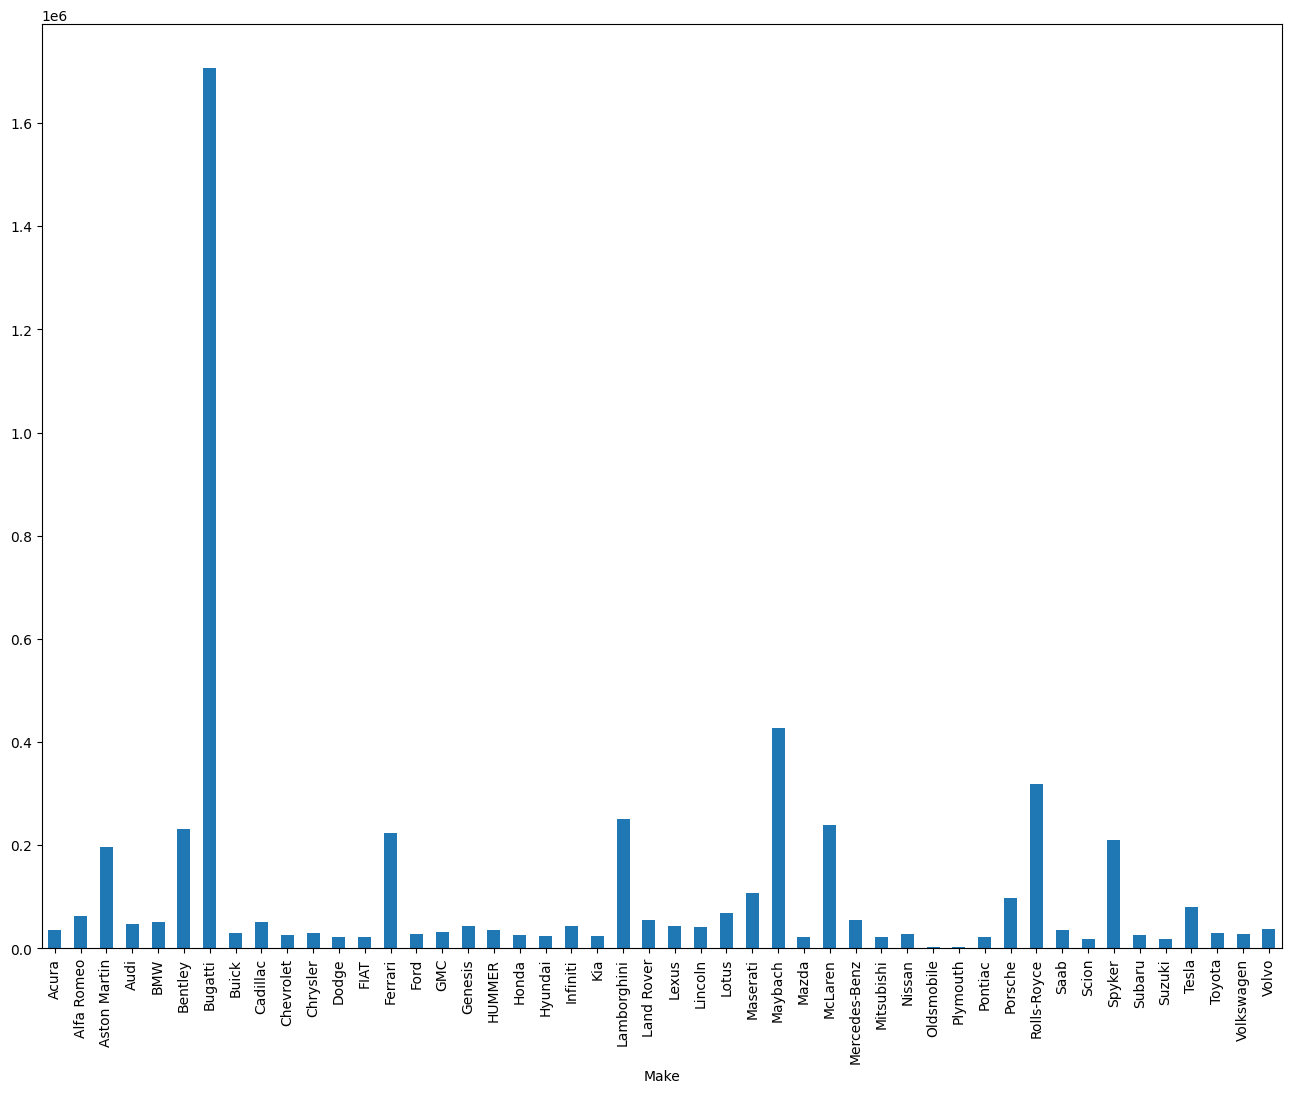

In [18]:
Make=data.groupby(['Make'])['MSRP'].median()
plt.figure(figsize=(16, 12))
Make.plot(kind='bar', stacked=True)

<u> Tâche 7</u>. Il semble judicieux de traiter des groupes de marques différemment selon leur gamme de prix. A l'aide des fonctions <span style="border:1px; border-style:solid">groupby</span> et <span style="border:1px; border-style:solid">join</span> de la librairie <u>pandas</u>, garder uniquement dans le jeu de données les marques de prix médian inférieur à $30000$\\$.

In [19]:
data=data.join(data.groupby('Make')['MSRP'].median(), on='Make', rsuffix='_Median')
data=data[data['MSRP_Median']<30000]
data=data.drop(['MSRP_Median'],axis=1)
data.reset_index(drop=True,inplace=True)

#Autre possibilité (sans utiliser 'join') :
#marquesAConserver = data.groupby(by='Make')['MSRP'].median()<30000
#marquesAConserver # marque True/False
#idxAConserver = data['Make'].apply(lambda x: marquesAConserver[x])
#data=data[idxAConserver]

In [20]:
data.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,FIAT,2017,unleaded,160.0,4.0,MANUAL,rear wheel drive,2.0,0,Convertible,35,26,819,27495
1,FIAT,2017,unleaded,160.0,4.0,MANUAL,rear wheel drive,2.0,0,Convertible,35,26,819,24995
2,FIAT,2017,unleaded,160.0,4.0,MANUAL,rear wheel drive,2.0,0,Convertible,35,26,819,28195
3,Chrysler,2015,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,23,1013,25170
4,Chrysler,2015,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,23,1013,23950


In [21]:
data.index

RangeIndex(start=0, stop=6948, step=1)

In [22]:
data.shape

(6948, 14)

><u> Tâche 8</u>. Vérifier qu'il n'il y pas d'outliers dans les valeurs des prix que nous avons gardé avec la fonction <span style="border:1px; border-style:solid">boxplot</span> de la librairie <u>seaborn</u> et enlevez-les le cas échéant. Combien de marques avons-nous gardées jusqu'à présent ?

<AxesSubplot:xlabel='MSRP'>

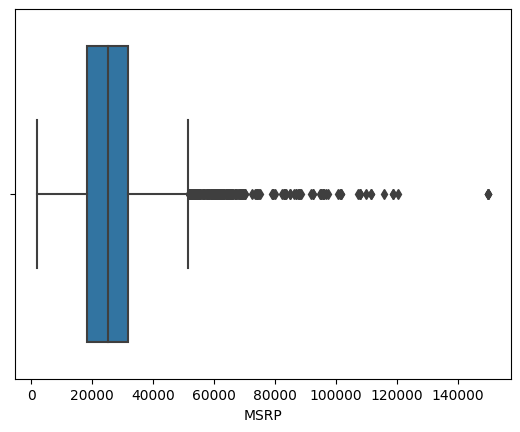

In [23]:
sns.boxplot(x=data['MSRP'])

In [24]:
data=data[data['MSRP']<140000]
data.reset_index(drop=True,inplace=True)

In [25]:
data.shape

(6944, 14)

In [26]:
data.index

RangeIndex(start=0, stop=6944, step=1)

In [27]:
data['Make'].nunique()

18

On restreint encore le nombre catégories en sélectionnant uniquement les marques suivantes : 'Ford', 'Chevrolet', 'Chrysler','Pontiac', 'Subaru', 'Hyundai', 'Honda', 'Mazda', 'Nissan' et 'Suzuki'.

In [28]:
Makes=['Ford','Chevrolet','Chrysler','Pontiac','Subaru',
       'Hyundai','Honda','Mazda', 'Nissan','Suzuki']
data=data[data.Make.isin(Makes)]
data.reset_index(drop=True,inplace=True)

><u>Tâche 9</u>. Effectuez une analyse préliminaire des relations entre ces variables, qui pourra nous mettre sur la piste des transformations et créations de feature à réaliser. Pour cela :
>
>- Regardez quelles sont les corrélations entre les variables quantitatives à l'aide des fonctions <span style="border:1px; border-style:solid">corr</span> de <u>pandas</u> et <span style="border:1px; border-style:solid">heatmap</span> de la librairie <u>seaborn</u>. Même chose pour les variables ordinales.
>- Visualiser les nuages de points et leur tendance linéaire ou non entre les différentes variables quantitatives et la variable que l'on veut prédire, 'MSRP', en utilisant la fonction <span style="border:1px; border-style:solid">regplot</span> de la librairie <u>seaborn</u>. Même chose pour les variables ordinales.
>- Visualiser les boxplots des différentes variables catégorielles relativement à la variable 'price' en utilisant la fonction <span style="border:1px; border-style:solid">boxplot</span> de la librairie <u>seaborn</u>.
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

<AxesSubplot:>

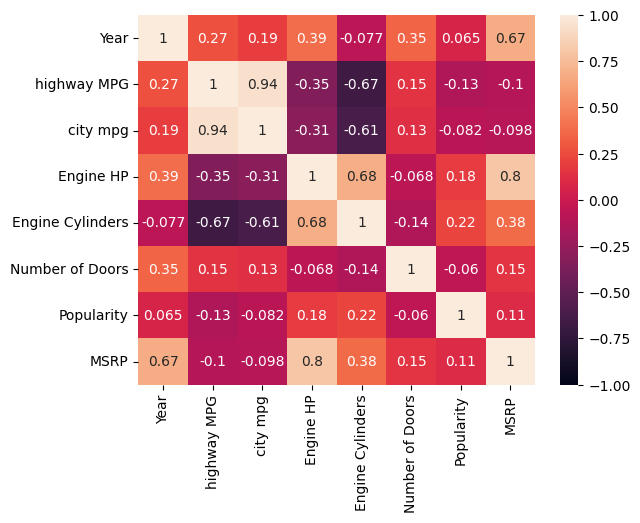

In [29]:
#correlation plot
corr = data[list_q+['MSRP']].corr()
sns.heatmap(corr, vmin=-1, vmax=1,annot=True)

In [30]:
print(corr)

                      Year  highway MPG  city mpg  Engine HP  \
Year              1.000000     0.273192  0.194467   0.385689   
highway MPG       0.273192     1.000000  0.941720  -0.347818   
city mpg          0.194467     0.941720  1.000000  -0.311200   
Engine HP         0.385689    -0.347818 -0.311200   1.000000   
Engine Cylinders -0.076539    -0.669115 -0.609996   0.683590   
Number of Doors   0.346771     0.147321  0.131062  -0.068304   
Popularity        0.065101    -0.132642 -0.081767   0.181885   
MSRP              0.672539    -0.104344 -0.098190   0.801281   

                  Engine Cylinders  Number of Doors  Popularity      MSRP  
Year                     -0.076539         0.346771    0.065101  0.672539  
highway MPG              -0.669115         0.147321   -0.132642 -0.104344  
city mpg                 -0.609996         0.131062   -0.081767 -0.098190  
Engine HP                 0.683590        -0.068304    0.181885  0.801281  
Engine Cylinders          1.000000        -

In [29]:
print(np.abs(corr['MSRP']).sort_values(ascending=False))

MSRP                1.000000
Engine HP           0.801281
Year                0.672539
Engine Cylinders    0.382778
Number of Doors     0.150105
Popularity          0.108686
highway MPG         0.104344
city mpg            0.098190
Name: MSRP, dtype: float64


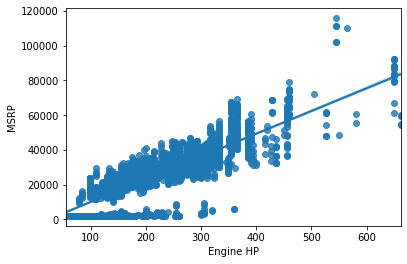

In [30]:
sns.regplot(x="Engine HP", y="MSRP", data=data)

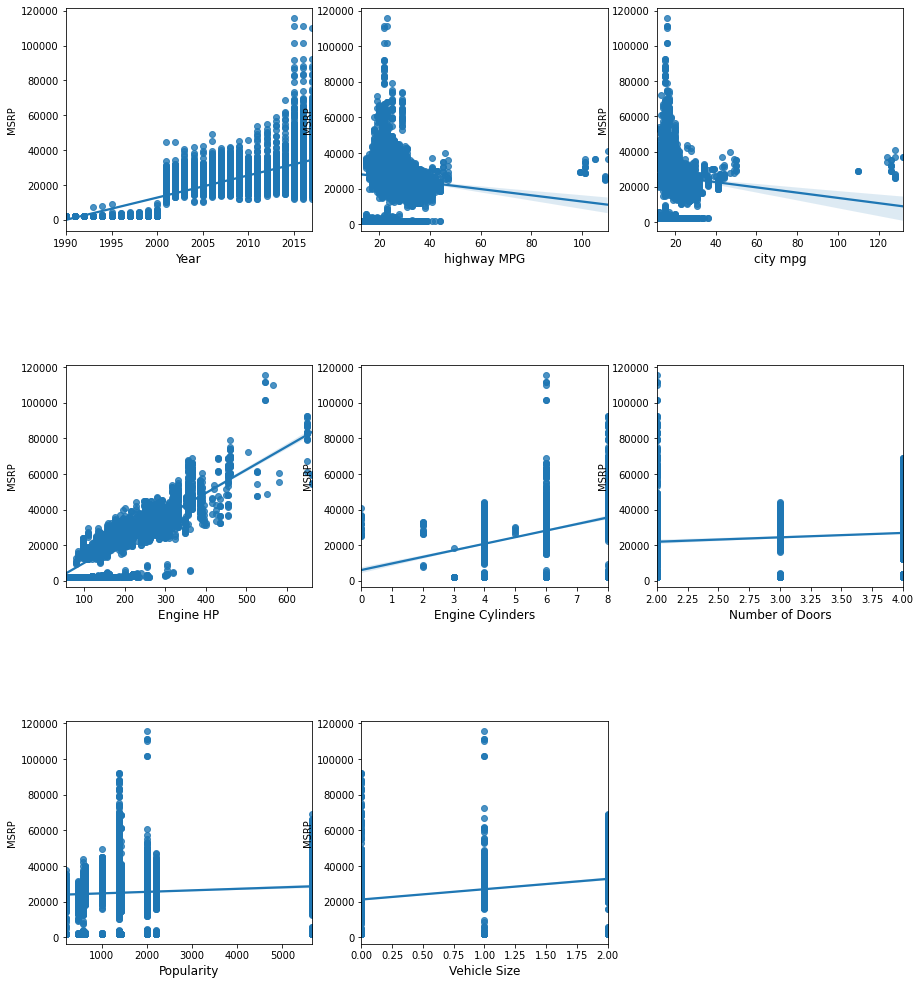

In [31]:
# subplots for loop to get all the graphs
rowCnt = len(list_q+list_o)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = .6)

for i in (list_q+list_o):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=data[[i]], y="MSRP", data=data)
    subCnt = subCnt + 1

plt.show()

#Autre possibilité :
#sns.pairplot(data, kind='reg')

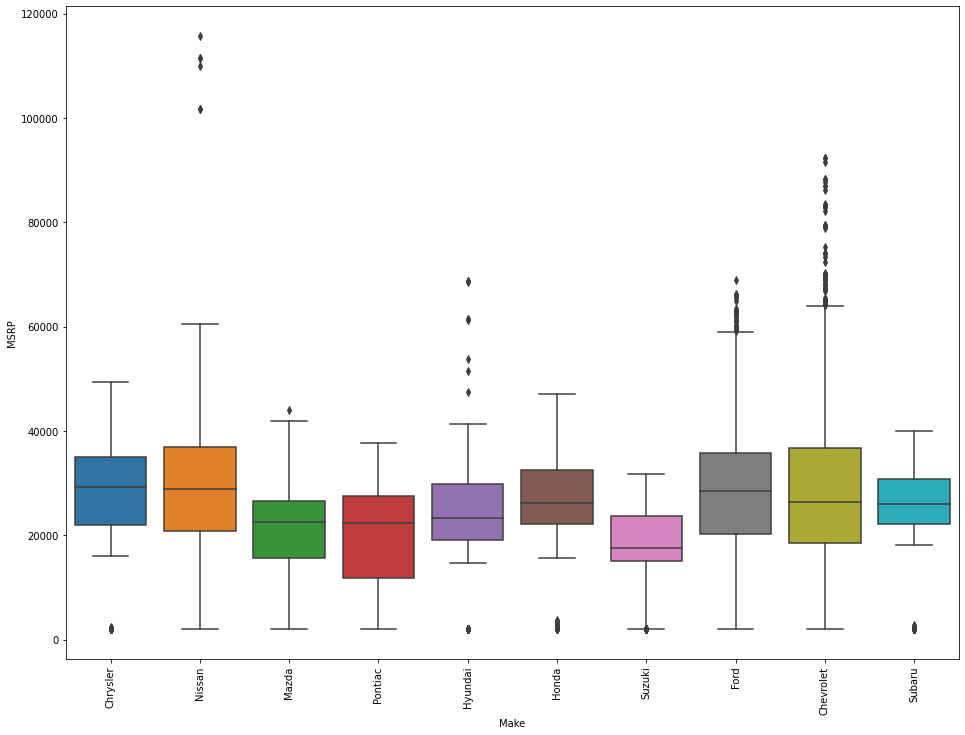

In [32]:
plt.figure(figsize=(16, 12))
ax = sns.boxplot(x='Make', y='MSRP', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

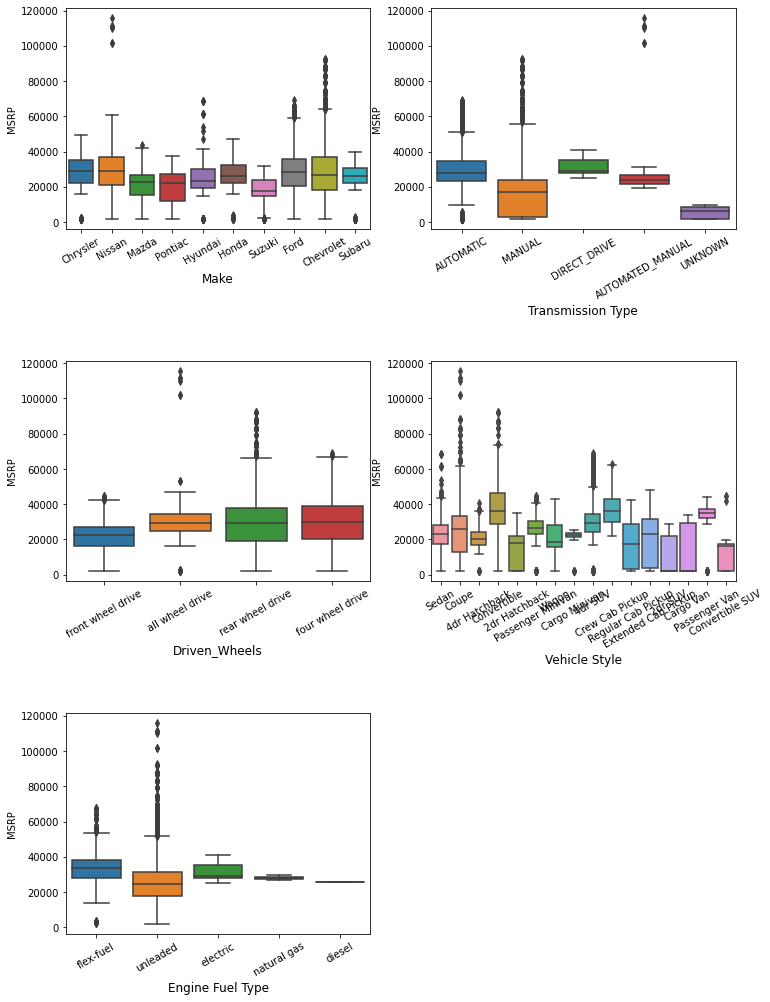

In [33]:
#  subplots for loop to get all the graphs
rowCnt = len(list_c)
colCnt = 2    
subCnt = 1  

fig = plt.figure(figsize=(12,30))
fig.subplots_adjust(hspace = .6)

for i in list_c:
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    ax = sns.boxplot(x=data[i], y='MSRP', data=data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
    subCnt = subCnt + 1

plt.show()

'Highway MPG' et 'city mpg' étant fortement corrélées, on ne garde que 'highway MPG' dans le jeu de données. On écarte également 'Popularity' qui semble peu pertinent.

In [33]:
data=data.drop(['city mpg','Popularity'],axis=1)

In [34]:
data.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,MSRP
0,Chrysler,2015,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,25170
1,Chrysler,2015,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,23950
2,Chrysler,2015,flex-fuel,295.0,6.0,AUTOMATIC,all wheel drive,4.0,1,Sedan,29,29370
3,Chrysler,2015,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,21995
4,Chrysler,2015,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,26625


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 2 Transformations essentielles

### 2-1 One-hot encoding

Nous allons maintenant transformer les variables catégorielles en utilisant l'encodage one-hot vu en cours. Pour cela nous utiliserons la fonction <span style="border:1px; border-style:solid">OneHotEncoder</span> se trouvant dans le module <u>preprocessing</u> de la librairie <u>sklearn</u>. Installez-la si nécessaire et importez-la :

In [32]:
from sklearn.preprocessing import OneHotEncoder

><u>Tâche 10</u>. Le code ci-dessous détaille pas-à-pas comment effectuer l'encodage one-hot. Complétez-le. (Pensez à utiliser les listes que nous avons définies). Pouvez-vous expliquez pourquoi nous allons encoder les variables 'Number of Doors', 'Vehicle Size' et 'Engine Cylinders' en one-hot ?

In [34]:
list_one_hot=list_c+list_o + ['Number of Doors','Engine Cylinders']
#On crée l'objet 'encoder_OH'
encoder_OH = OneHotEncoder(handle_unknown='error',sparse=False)
#On ajuste nos données à l'objet 'encoder_OH'
fit_OH=encoder_OH.fit(data[list_one_hot])
#On transforme nos données catégorielles grâce à l'objet 'encoder_OH'
fit_data_OH=fit_OH.transform(data[list_one_hot])
#On récupère les noms pour nos nouvelles colonnes
column_name_OH =fit_OH.get_feature_names_out(list_one_hot)
#On met nos données transformées sous forme de Dataframe
cols_OH = pd.DataFrame(fit_data_OH,columns=column_name_OH)
#on réinitialise l'index
cols_OH.reset_index(drop=True, inplace=True)

In [35]:
list_one_hot


['Make',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Style',
 'Engine Fuel Type',
 'Vehicle Size',
 'Number of Doors',
 'Engine Cylinders']

In [38]:
cols_OH.isna().sum().sum()

0

In [39]:
cols_OH.head()

,Make_Chevrolet,Make_Chrysler,Make_Ford,Make_Honda,Make_Hyundai,Make_Mazda,Make_Nissan,Make_Pontiac,Make_Subaru,Make_Suzuki,...,Number of Doors_2.0,Number of Doors_3.0,Number of Doors_4.0,Engine Cylinders_0.0,Engine Cylinders_2.0,Engine Cylinders_3.0,Engine Cylinders_4.0,Engine Cylinders_5.0,Engine Cylinders_6.0,Engine Cylinders_8.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
cols_OH.shape

(4713, 53)

In [41]:
data.shape

(4713, 12)

In [42]:
data[list_one_hot].nunique()

Make                 10
Transmission Type     5
Driven_Wheels         4
Vehicle Style        16
Engine Fuel Type      5
Vehicle Size          3
Number of Doors       3
Engine Cylinders      7
dtype: int64

><u>Tâche 11</u>. Nous allons vérifier que le code précédent est correct, c'est-à-dire qu'il effectue bien ce qu'on attend de lui. 
>- Combien de variables catégorielles avions-nous avant transformation ? Avec combien de catégories chacunes ? Combien de variables 'one-hot' avons nous après transformations ? Cela est-il cohérent ?
>- Visualisez le nom des colonnes de nos nouvelles variables en utilisant la commande <span style="border:1px; border-style:solid">list(cols_train_OH.columns)</span>. Est-ce que ces noms sont cohérents et utiles ?
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

In [43]:
 list(cols_OH.columns)

['Make_Chevrolet',
 'Make_Chrysler',
 'Make_Ford',
 'Make_Honda',
 'Make_Hyundai',
 'Make_Mazda',
 'Make_Nissan',
 'Make_Pontiac',
 'Make_Subaru',
 'Make_Suzuki',
 'Transmission Type_AUTOMATED_MANUAL',
 'Transmission Type_AUTOMATIC',
 'Transmission Type_DIRECT_DRIVE',
 'Transmission Type_MANUAL',
 'Transmission Type_UNKNOWN',
 'Driven_Wheels_all wheel drive',
 'Driven_Wheels_four wheel drive',
 'Driven_Wheels_front wheel drive',
 'Driven_Wheels_rear wheel drive',
 'Vehicle Style_2dr Hatchback',
 'Vehicle Style_2dr SUV',
 'Vehicle Style_4dr Hatchback',
 'Vehicle Style_4dr SUV',
 'Vehicle Style_Cargo Minivan',
 'Vehicle Style_Cargo Van',
 'Vehicle Style_Convertible',
 'Vehicle Style_Convertible SUV',
 'Vehicle Style_Coupe',
 'Vehicle Style_Crew Cab Pickup',
 'Vehicle Style_Extended Cab Pickup',
 'Vehicle Style_Passenger Minivan',
 'Vehicle Style_Passenger Van',
 'Vehicle Style_Regular Cab Pickup',
 'Vehicle Style_Sedan',
 'Vehicle Style_Wagon',
 'Engine Fuel Type_diesel',
 'Engine Fuel T

><u>Commentaires sur l'ensemble de la section 2</u>. Nous avons créé $53$ variables : on passe ainsi de $8$ variables catégorielles à $10$, $5$, $4$, $16$, $5$ $3$ et $7$ catégories à $53$ variables binaires.
> 
> Les nouveaux noms nous aide à identifier clairement la signification de chaque colonne : il est important de les garder pour l'interprétation des résultats après modélisation, pour l'exploitation et l'interprétation du modèle.
>
>Remarque : en cours, nous avons utilisé la fonction <span style="border:1px; border-style:solid">get_dummies</span> de <u>pandas</u> pour effectuer l'encodage one-hot. Pour une comparaison entre get_dummies et OneHotEncoder, voir la fin.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 2-2 Mise à l'échelle

Nous allons maintenant mettre à l'échelle les variables quantitatives restantes en utilisant la standardisation vue en cours. Pour cela nous utiliserons la fonction <span style="border:1px; border-style:solid">StandardScaler</span> se trouvant dans le module <u>preprocessing</u> de la librairie <u>sklearn</u>. Installez-la si nécessaire et importez-la :

In [44]:
from sklearn.preprocessing import StandardScaler

><u>Tâche 12</u>. Le code ci-dessous détaille pas-à-pas comment effectuer la standardisation. Complétez-le.

In [45]:
list_std=['Year','Engine HP','highway MPG']
#On crée l'objet 'scale'
scale = StandardScaler()
#On ajuste nos données à l'objet 'scale'
fit_scale_OH=scale.fit_transform(data[list_std])
#On met sous forme de Dataframe
cols_scaled = pd.DataFrame(fit_scale_OH,columns=list_std)
cols_scaled.reset_index(drop=True, inplace=True)

><u>Tâche 13</u>. Nous allons vérifier que le code précédent est correct, c'est-à-dire qu'il effectue bien ce qu'on attend de lui. 
>- Combien de variables avions-nous avant transformation ? Combien de variables avons-nous après transformation ?
>- Visualisez les nouvelles variables en utilisant la commande <span style="border:1px; border-style:solid">describe</span>. Est-ce que cela est cohérent ?
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

In [46]:
print(data[list_std].shape)
print(cols_scaled.isna().sum().sum())

(4713, 3)
0


In [47]:
cols_scaled.describe()

,Year,Engine HP,highway MPG
count,4.713000e+03,4.713000e+03,4.713000e+03
mean,-1.440699e-14,-5.922132e-17,9.498261e-16
std,1.000106e+00,1.000106e+00,1.000106e+00
min,-2.716993e+00,-1.906046e+00,-1.686967e+00
25%,-6.861856e-01,-7.409412e-01,-6.087308e-01
50%,5.322987e-01,-2.166440e-01,-1.295145e-01
75%,8.030730e-01,6.571846e-01,4.695059e-01
max,9.384601e-01,5.166140e+00,9.934028e+00


><u>Tâche 14</u>. Concaténez les deux parties (variables quantitatives standardisées et variables catégorielles encodées en un seul Dataframe *X_init_OH*.

In [48]:
X_init_OH = pd.concat([cols_scaled, cols_OH], axis=1)

In [49]:
X_init_OH.describe()

,Year,Engine HP,highway MPG,Make_Chevrolet,Make_Chrysler,Make_Ford,Make_Honda,Make_Hyundai,Make_Mazda,Make_Nissan,...,Number of Doors_2.0,Number of Doors_3.0,Number of Doors_4.0,Engine Cylinders_0.0,Engine Cylinders_2.0,Engine Cylinders_3.0,Engine Cylinders_4.0,Engine Cylinders_5.0,Engine Cylinders_6.0,Engine Cylinders_8.0
count,4.713000e+03,4.713000e+03,4.713000e+03,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,...,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
mean,-1.440699e-14,-5.922132e-17,9.498261e-16,0.238277,0.039677,0.186505,0.095268,0.064290,0.089752,0.117972,...,0.235731,0.053469,0.710800,0.004880,0.004244,0.002758,0.454275,0.001061,0.401655,0.131127
std,1.000106e+00,1.000106e+00,1.000106e+00,0.426075,0.195221,0.389555,0.293616,0.245295,0.285856,0.322609,...,0.424500,0.224991,0.453439,0.069695,0.065011,0.052453,0.497958,0.032558,0.490285,0.337575
min,-2.716993e+00,-1.906046e+00,-1.686967e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.861856e-01,-7.409412e-01,-6.087308e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.322987e-01,-2.166440e-01,-1.295145e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.030730e-01,6.571846e-01,4.695059e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,9.384601e-01,5.166140e+00,9.934028e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
X_init_OH.shape

(4713, 56)

In [51]:
X_init_OH.isna().sum().sum()

0

><u>Commentaire sur la section 2-2</u> On garde le même nombre de variables quantitatives, soit $3$. Au total, notre jeu de données transformé contient $56$ features et $4713$ observations.
>
>Ici j'ai privilégié la standardisation car c'est la mise à l'échelle la plus couramment recommandée lorsque l'on utilise des algorithmes qui requièrent une mise à l'échelle (ACP, SVM, ...).
>
>Sur d'autres jeux de données, il peut être plus intéressant d'utiliser la normalisation (pas vue en cours) ou la mise à l'échelle min-max.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 2-3 Résultat de référence

Nous souhaitons vérifier que ces transformations sont bien utiles et que l'augmentation de la dimension qui en découle n'est pas délétère.

Pour cela nous allons utiliser les fonctions <span style="border:1px; border-style:solid">score_model_1</span> et <span style="border:1px; border-style:solid">score_model_2</span> suivantes. Il n'est pas nécessaire de comprendre exactement de ce que font ces fonctions, vous pouvez vous en servir comme d'une boîte noire qui vous indique à quel point vos données sont bien préparées : plus le score est **petit**, **meilleur** est votre jeu de données.

Nous utiliserons aussi les méthodes ci-dessous issues de <u>sklearn</u>. Installez-les si nécessaire et importez-les :

In [52]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [53]:
def score_model_1(X_train,y_train,X_test,y_test):
    #on crée l'objet modèle linéaire
    regr = LinearRegression()

    #on ajuste le modèle sur les données d'entrainement et on enregistre et affiche le temps nécessaire pour cela
    start = time.time()
    regr.fit(X_train, y_train)
    end = time.time()
    print('Temps d execution du modèle 1 : ' "{:e}".format(end - start))

    #On fait des prédictions sur les données de l'enseble de test
    prix_y_pred = regr.predict(X_test)
    
    #On affiche le score du modèle
    print('Score MSE sur le modele 1 : ')
    print("{:e}".format(mean_squared_error(y_test, prix_y_pred)))
    print('Score R2 sur le modele 1 : ')
    print(r2_score(y_test, prix_y_pred))

In [54]:
def score_model_2(X_train,y_train,X_test,y_test):
    #on crée l'objet modèle linéaire
    regr = SGDRegressor(max_iter=500,penalty=None,eta0=0.01,random_state=42)
    
    #on ajuste le modèle sur les données d'entrainement et on enregistre et affiche le temps nécessaire pour cela
    start = time.time()
    regr.fit(X_train, y_train)
    end = time.time()
    print('Temps d execution du modèle 2 : ' "{:e}".format(end - start))

    #On fait des prédictions sur les données de l'enseble de test
    prix_y_pred = regr.predict(X_test)
    
    #On affiche le score du modèle
    print('Score MSE sur le modele 2 : ')
    print("{:e}".format(mean_squared_error(y_test, prix_y_pred)))
    print('Score R2 sur le modele 2 : ')
    print(r2_score(y_test, prix_y_pred))

>Expliquons tout de même brièvement en quoi consistent ces fonctions (la lecture de ce paragraphe n'est pas nécessaire à la poursuite du TP et vous pouvez le sauter sans remord). Les deux fonctions prennent en entrée des données d'apprentissage, les prédicteurs (ou variables explicatives) et les réponses (ou variables à expliquer) correspondantes. Avec ces données, on entraîne un modèle, c'est-à-dire qu'on cherche les paramètres optimaux de ce modèle. La fonction *score_model_1* fait une régression linéaire (on étudiera cela bientôt) avec les paramètres par défaut de l'algorithme donné par sklearn et la fonction *score_model_2* fait une régression linéaire plus élaborée. 
>
>Une fois les paramètres trouvés, on veut voir si ce modèle est bon. On va donc lui demander de prédire des prix sur des données qu'il n'a jamais vu avant. Si le modèle est bon, il va trouver à partir de de l'ensemble de test des valeurs plutôt proches des vrais prix. Pour savoir à quel point on est porche de du vrai prix, on calcul [l'erreur quadratique moyenne](https://en.wikipedia.org/wiki/Mean_squared_error#Predictor) entre les prédictions et les vrais prix : plus elle est petite, meilleur est le modèle. Nous donnons aussi le [coefficient de détermination](https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination) : plus il est proche de un est meilleur est le modèle.

Enfin, nous avons besoin de séparer *X_init_OH en deux parties (l'ensemble d'apprentissage et l'ensemble de test).

In [55]:
X_train, X_test, y_train, y_test  = train_test_split(X_init_OH,data['MSRP'], test_size=0.2,random_state=42)
idx=X_train.index.values
idxT=X_test.index.values

><u>Tâche 15</u>. Tout est prêt pour mesurer la qualité de notre jeu de données. Complétez le code suivant et notez les scores et les temps d'exécution obtenus, cela nous servira à faire des comparaisons plus tard. 

In [56]:
X_train=X_init_OH.iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_init_OH.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train.values.ravel(),X_test,y_test)

Temps d execution du modèle 1 : 3.056526e-02
Score MSE sur le modele 1 : 
3.257181e+07
Score R2 sur le modele 1 : 
0.8251721059530489


Temps d execution du modèle 2 : 1.306889e-01
Score MSE sur le modele 2 : 
3.074164e+07
Score R2 sur le modele 2 : 
0.8349954886303543


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 2-4 One-hot encoding vs label encoding

Le but de ce paragraphe est de vous convaincre que l'encodage one-hot est bien utile. A cette fin, nous allons donc faire **<u>ce qu'il ne faut jamais faire en pratique</u>**, à savoir labelliser les variables catégorielles. Nous utilisons pour cela la fonction <span style="border:1px; border-style:solid">OrdinalEncoder</span> de <u>sklearn</u> (et d'ailleurs, comme son nom l'indique, cette fonction doit être réservée aux variables ordinales). Nous garderons <u>les variables quantitatives mises à l'échelle</u> dans cette partie.

In [57]:
from sklearn.preprocessing import OrdinalEncoder

><u>Tâche 16</u>. Complétez le code suivant afin de labelliser les variables catégorielles. Vérifier ensuite, comme dans les tâches précédentes, que le code que vous avez écrit fait bien ce qu'on attend de lui.

In [58]:
#On crée l'objet 'encoder_O'
encoder_O = OrdinalEncoder()
#On ajuste nos données à l'objet 'encoder_O'
fit_O=encoder_O.fit(data[list_one_hot])
#On transforme nos données catégorielles grâce à l'objet 'encoder_OH'
fit_data_O=fit_O.transform(data[list_one_hot])
#On met nos données transformées sous forme de Dataframe
cols_O = pd.DataFrame(fit_data_O,columns=list_one_hot)
#on réinitialise l'index
cols_O.reset_index(drop=True, inplace=True)

><u>Tâche 17</u>. Concaténez les deux parties (variables quantitatives standardisées et variables catégorielles labellisées en un seul Dataframe *X_init_O*.

In [59]:
X_init_O = pd.concat([cols_scaled, cols_O], axis=1)

><u>Tâche 18</u>. Appliquer les fonctions *score_model_1* et *score_model_2* pour connaître les scores et les temps d'éxecution des modèles 1 et 2 en utilisant ces données.  
>
>Retrouve-t-on ce qu'on a vu en cours, à savoir, que le label encoding est une très mauvaise idée pour des données catégorielles ? Le temps d'exécution est-il impacté par l'encodage one-hot sur ce jeu de données ?
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

In [60]:
X_init_O.shape

(4713, 11)

In [61]:
X_train=X_init_O.iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_init_O.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 3.732204e-03
Score MSE sur le modele 1 : 
3.591171e+07
Score R2 sur le modele 1 : 
0.8072453567982052


Temps d execution du modèle 2 : 6.329489e-02
Score MSE sur le modele 2 : 
3.932530e+07
Score R2 sur le modele 2 : 
0.7889230491045544


><u>Commentaire sur la section 2-4</u>.Le nombre de features total reste le même qu'initialement : $11$
>
>Le label encoding donne un résultat moins bon sur les deux modèles : c'est bien ce qu'on avait dit en cours. 

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 2-5 Oubli de mise à l'échelle

Le but de ce paragraphe est de vous sensibiliser à la mise à l'échelle. A cette fin, nous allons donc faire l'inverse de la partie précédente : garder les variables quantitatives brutes (non mises à l'échelle) et utiliser l'encodage one-hot de la section 2-1.

En théorie, on s'attend à ce que le modèle 1 ne soit pas impacté (la régression linéaire ne repose pas sur des distances) alors que le modèle 2 peut l'être (au cause de la régularisation et de la descente de gradient stochastique qui sont sensibles aux ordres de magnitude des features).

><u>Tâche 19</u>. Créer un nouveau Dataframe *X_non_scaled* contenant les variables quantitatives non mises à l'échelle et les variables catégorielles one-hot des données d'apprentissage.
>
>Appliquer les fonctions *score_model_1* et *score_model_2* pour connaître les scores et les temps d'éxecution des modèles 1 et 2 en utilisant ces données.  
>
>Retrouve-t-on ce à quoi on s'attend en théorie ? Le temps d'exécution est-il impacté ?
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

In [62]:
X_non_scaled=pd.concat([data[list_std], cols_OH], axis=1)

In [63]:
X_non_scaled.isna().sum().sum()

0

In [64]:
X_train=X_non_scaled.iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_non_scaled.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 9.827614e-03
Score MSE sur le modele 1 : 
3.087586e+07
Score R2 sur le modele 1 : 
0.8342750756730535


Temps d execution du modèle 2 : 1.516240e-01
Score MSE sur le modele 2 : 
3.002284e+29
Score R2 sur le modele 2 : 
-1.6114640363028698e+21


><u>Commentaire sur la section 2-5</u>. Le modèle $1$ est amélioré par l'utilisation des données brutes. Cependant le modèle $2$, comme attendu, non seulement ne donne pas de score satisfaisant, mais bien plus que ça : il diverge (il ``crashe'') complètement avec un score en $10^{29}$ et un $R^2$ qui devient même négatif$.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 2-6 Sur les données non standardisées et mal encodées

Ce dernier paragraphe de la section a pour objet de bien enfoncer le clou : que se passe-t-il si on oublit les deux points essentiels de ce cours : l'encodage one-hot et la mise à l'échelle ?

><u>Tâche 20</u> (facultative). Créer un nouveau Dataframe *X_none* contenant les variables quantitatives non mises à l'échelle et les variables catégorielles labellisées des données d'apprentissage.
>
>Appliquer les fonctions *score_model_1* et *score_model_2* pour connaître les scores et les temps d'exécution des modèles 1 et 2 en utilisant ces données.  
>
>Retrouve-t-on ce à quoi on s'attend en théorie ?
>
> Pensez à utiliser autant de cellules de code que nécessaire pour avoir un document agréable à lire et bien organisé.

In [65]:
X_none=pd.concat([data[list_std], cols_O], axis=1)

In [66]:
X_train=X_none.iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_none.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 3.305435e-03
Score MSE sur le modele 1 : 
3.591171e+07
Score R2 sur le modele 1 : 
0.8072453567982046


Temps d execution du modèle 2 : 4.666042e-02
Score MSE sur le modele 2 : 
4.583755e+30
Score R2 sur le modele 2 : 
-2.4603120415148677e+22


<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 3 Création de features

### 3-1 Le cas de la variable 'Year'

><u>Tâche 21</u>. Quand on cherche à acheter une voiture, on va plutôt considérer l'âge de la voiture. Créez la variable 'Age' à partir de la variable 'Year' et substituez là à celle-ci puis tester cette modification avec *score_model_1* et *score_model_2*

In [67]:
print(data['Year'].max())

2017


In [68]:
data['Age']=2017-data['Year']

In [69]:
data=data.drop('Year',axis=1)

In [70]:
data.head()

,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,MSRP,Age
0,Chrysler,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,25170,2
1,Chrysler,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,23950,2
2,Chrysler,flex-fuel,295.0,6.0,AUTOMATIC,all wheel drive,4.0,1,Sedan,29,29370,2
3,Chrysler,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,21995,2
4,Chrysler,flex-fuel,184.0,4.0,AUTOMATIC,front wheel drive,4.0,1,Sedan,36,26625,2


In [71]:
#On crée l'objet 'scale'
list_std=['Age','highway MPG', 'Engine HP']
scale = StandardScaler()
#On ajuste nos données à l'objet 'scale'
fit_scale_OH=scale.fit_transform(data[list_std])
#On met sous forme de Dataframe
cols_scaled = pd.DataFrame(fit_scale_OH,columns=list_std)
cols_scaled.reset_index(drop=True, inplace=True)

In [72]:
X_age_OH = pd.concat([cols_scaled, cols_OH], axis=1)

In [73]:
X_train=X_age_OH.iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_age_OH.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 1.083112e-02
Score MSE sur le modele 1 : 
3.830619e+07
Score R2 sur le modele 1 : 
0.7943930415420104


Temps d execution du modèle 2 : 1.487923e-01
Score MSE sur le modele 2 : 
3.074164e+07
Score R2 sur le modele 2 : 
0.8349954886303543


><u>Commentaire sur la section 3-1</u>. On n'observe pas d'amélioration avec cette transformation.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 3-2 Le cas de la variable 'highway MPG' : première approche

><u>Tâche 22</u>.L'unité mpg, miles per gallon, est utilisé aux Etats-Unis. En France, on parle plutôt de litre au cent (km). Ajoutez au jeu de données une nouvelle variable 'highway Lkm' qui est donc la consommation en litre aux $100$ kilomètres. Est-ce que cela améliore notre jeu de données (n'oubliez pas de standardiser la nouvelle variable !).

In [74]:
data['highway Lkm']=(235/data['highway MPG'])

In [75]:
#On crée l'objet 'scale'
list_std=['Age','Engine HP','highway Lkm','highway MPG']
scale = StandardScaler()
#On ajuste nos données à l'objet 'scale'
fit_scale_OH=scale.fit_transform(data[list_std])
#On met sous forme de Dataframe
cols_scaled = pd.DataFrame(fit_scale_OH,columns=list_std)
cols_scaled.reset_index(drop=True, inplace=True)

In [76]:
X_inv_OH = pd.concat([cols_scaled, cols_OH], axis=1)

In [77]:
X_train=X_inv_OH.iloc[idx].drop('highway MPG',axis=1)#meilleur résultat si on enlève 'highway MPG'
y_train=data['MSRP'].iloc[idx]
X_test=X_inv_OH.iloc[idxT].drop('highway MPG',axis=1)
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 9.817362e-03
Score MSE sur le modele 1 : 
3.084864e+07
Score R2 sur le modele 1 : 
0.8344211439461533


Temps d execution du modèle 2 : 9.339237e-02
Score MSE sur le modele 2 : 
3.070092e+07
Score R2 sur le modele 2 : 
0.8352140230801673


><u>Commentaire sur la section 3-2</u>. On observe une légère amélioration avec cette transformation.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 3-3 Terme d'interaction

><u>Tâche 23</u>. Créer une nouvelle variable 'Age_MPG' qui est égale à l'âge du véhicule multiplié par sa consommation en conduite sur route 'Highway MPG'. Cela améliore-t-il notre jeu de données (n'oubliez pas de standardiser la nouvelle variables !) ?

In [78]:
data['Age_MPG']=data['highway MPG']*data['Age']

In [79]:
#On crée l'objet 'scale'
list_std=['Age','Engine HP','highway Lkm','Age_MPG']
scale = StandardScaler()
#On ajuste nos données à l'objet 'scale'
fit_scale_OH=scale.fit_transform(data[list_std])
#On met sous forme de Dataframe
cols_scaled = pd.DataFrame(fit_scale_OH,columns=list_std)
cols_scaled.reset_index(drop=True, inplace=True)

In [80]:
X_prod_OH = pd.concat([cols_scaled, cols_OH], axis=1)

In [81]:
X_train=X_prod_OH .iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_prod_OH.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 2.470112e-02
Score MSE sur le modele 1 : 
2.842230e+07
Score R2 sur le modele 1 : 
0.8474444419960051


Temps d execution du modèle 2 : 1.644914e-01
Score MSE sur le modele 2 : 
2.830696e+07
Score R2 sur le modele 2 : 
0.8480635360044839


<u>Commentaire sur la section 3-3</u> On observe une amélioration.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

### 3-4 Encore des transformations ...

><u>Tâche 24</u>. Trouver quelles feature $f(x)$ ajouter au jeu de données pour $f\in \{\log(\cdot), \sqrt{\cdot}, \sqrt[3]{\cdot}\}$ et $x\in \{\text{'Engine HP', 'highway MPG'}\}$. Pour cela vous pouvez :
>- Tracer les nuages de points $(f(x),\text{'MSRP'})$
>- Regarder les coefficients de corrélations de $f(x)$ avec $\text{'MSRP'}$.
> Une fois votre choix fait, testez votre jeu de données comme précédemment.

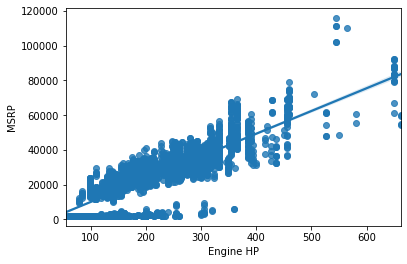

In [82]:
#Pour comparaison, on trace le nuage de points initial
sns.regplot((data['Engine HP']), data['MSRP'])

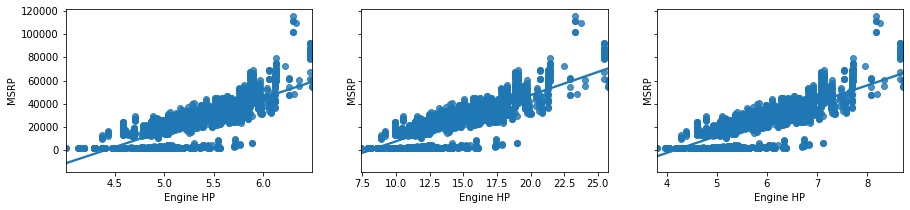

In [83]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(15,3))
sns.regplot( np.log(data['Engine HP']), data['MSRP'],ax=ax1)
sns.regplot( (data['Engine HP'])**0.5, data['MSRP'],ax=ax2)
sns.regplot( np.power(data['Engine HP'],1/3), data['MSRP'],ax=ax3)

In [84]:
print(data['Engine HP'].corr(data['MSRP']))
print(np.log(data['Engine HP']).corr(data['MSRP']))
print(((data['Engine HP'])**0.5).corr(data['MSRP']))
print(np.power(data['Engine HP'],1/3).corr(data['MSRP']))

0.8012811278371574
0.7709989769617988
0.7926713539241399
0.7868051965469633


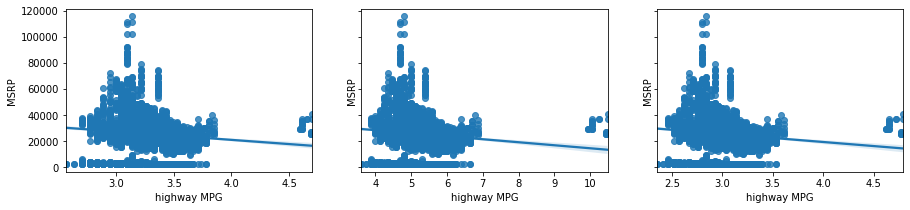

In [85]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(15,3))
sns.regplot( np.log(data['highway MPG']), data['MSRP'],ax=ax1)
sns.regplot( (data['highway MPG'])**0.5, data['MSRP'],ax=ax2)
sns.regplot( np.power(data['highway MPG'],1/3), data['MSRP'],ax=ax3)

In [86]:
print(data['highway MPG'].corr(data['MSRP']))
print(np.log(data['highway MPG']).corr(data['MSRP']))
print(np.power(data['highway MPG'],1/2).corr(data['MSRP']))
print(np.power(data['highway MPG'],1/3).corr(data['MSRP']))

-0.10434422120544612
-0.11723657488479156
-0.11597216424704117
-0.11743406017035975


In [87]:
data['Engine HP r2']=np.power(data['Engine HP'],1/2)
data['highway MPG r3']=np.power(data['highway MPG'],1/3)

In [88]:
#On crée l'objet 'scale'
list_std=['Age','Engine HP','highway Lkm','highway MPG r3','Engine HP r2','Age_MPG']
scale = StandardScaler()
#On ajuste nos données à l'objet 'scale'
fit_scale_OH=scale.fit_transform(data[list_std])
#On met sous forme de Dataframe
cols_scaled = pd.DataFrame(fit_scale_OH,columns=list_std)
cols_scaled.reset_index(drop=True, inplace=True)

In [89]:
X_trans_OH = pd.concat([cols_scaled, cols_OH], axis=1)

In [90]:
X_train=X_trans_OH.iloc[idx]
y_train=data['MSRP'].iloc[idx]
X_test=X_trans_OH.iloc[idxT]
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 1.119351e-02
Score MSE sur le modele 1 : 
2.768938e+07
Score R2 sur le modele 1 : 
0.8513783449914263


Temps d execution du modèle 2 : 1.744606e-01
Score MSE sur le modele 2 : 
2.775670e+07
Score R2 sur le modele 2 : 
0.8510170381366852


><u>Commentaire sur la section 3-4</u>. On sélectionne $\sqrt{\text{'Engine HP'}}$ et $\sqrt[3]{\text{'Engine HP}}$ qui ont les corrélations les plus fortes avec 'MSRP'. Le score des deux modèles est amélioré.

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 4 Et les variables catégorielles ?

### 4-1 Sont-elles toutes déterminantes ?

><u>Tâche 25</u>. Si certaines features sont très corrélées avec d'autres, ou bien si elles sont complètement sans effet sur le prédicteur, cela peut diminuer les résultats d'un modèle. Les résultats sont-ils meilleurs avec ou sans les variables 'Vehicle size' et 'Number of Doors' ? Pouvait-on le prévoir ?

In [91]:
list(X_trans_OH.columns)

['Age',
 'Engine HP',
 'highway Lkm',
 'highway MPG r3',
 'Engine HP r2',
 'Age_MPG',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Ford',
 'Make_Honda',
 'Make_Hyundai',
 'Make_Mazda',
 'Make_Nissan',
 'Make_Pontiac',
 'Make_Subaru',
 'Make_Suzuki',
 'Transmission Type_AUTOMATED_MANUAL',
 'Transmission Type_AUTOMATIC',
 'Transmission Type_DIRECT_DRIVE',
 'Transmission Type_MANUAL',
 'Transmission Type_UNKNOWN',
 'Driven_Wheels_all wheel drive',
 'Driven_Wheels_four wheel drive',
 'Driven_Wheels_front wheel drive',
 'Driven_Wheels_rear wheel drive',
 'Vehicle Style_2dr Hatchback',
 'Vehicle Style_2dr SUV',
 'Vehicle Style_4dr Hatchback',
 'Vehicle Style_4dr SUV',
 'Vehicle Style_Cargo Minivan',
 'Vehicle Style_Cargo Van',
 'Vehicle Style_Convertible',
 'Vehicle Style_Convertible SUV',
 'Vehicle Style_Coupe',
 'Vehicle Style_Crew Cab Pickup',
 'Vehicle Style_Extended Cab Pickup',
 'Vehicle Style_Passenger Minivan',
 'Vehicle Style_Passenger Van',
 'Vehicle Style_Regular Cab Pickup',
 'Veh

In [92]:
X_train=X_trans_OH.iloc[idx].drop([ 'Vehicle Size_0',
 'Vehicle Size_1',
 'Vehicle Size_2',],axis=1)
y_train=data['MSRP'].iloc[idx]
X_test=X_trans_OH.iloc[idxT].drop([ 'Vehicle Size_0',
 'Vehicle Size_1',
 'Vehicle Size_2',],axis=1)
y_test=data['MSRP'].iloc[idxT]
score_model_1(X_train,y_train,X_test,y_test)
print('\n')
score_model_2(X_train,y_train,X_test,y_test)

Temps d execution du modèle 1 : 1.334405e-02
Score MSE sur le modele 1 : 
2.769738e+07
Score R2 sur le modele 1 : 
0.8513354350158457


Temps d execution du modèle 2 : 1.287494e-01
Score MSE sur le modele 2 : 
2.772316e+07
Score R2 sur le modele 2 : 
0.8511970278639178


><u>Commentaires</u>. Le score est légèrement amélioré sans 'Vehicle Size'. De manière général, retirer ces variables n'a pas d'impact significatif sur le score. On pouvait s'y attendre car dans la section $1$, on voit qu'il n'y a pas de relation entre le prix et ces deux variables (voir la corrélation, le nuage de points et le boxplot).
>
> Il existe des méthodes rigoureuses pour choisir les variables les plus pertinentes. Cela s'appelle la *sélection de features* et fait l'objet d'un cours en particulier pour ceux d'entre vous qui continueront un cursus data science.

><u>Tâche 26</u> Tracez le nuage de points de la feature 'MSPR' en fonction de 'highway MPG' avec les labels des classes de 'Transmission Type'. Commentez.

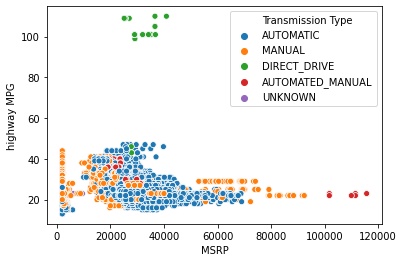

In [93]:
sns.scatterplot(x="MSRP", y="highway MPG", hue="Transmission Type",data=data)

><u>Commentaire</u>. On voit que la catégorie 'DIRECT_DRIVE' de la variable 'Transmission Type' contribue à expliquer la relation entre 'highway MPG' et le prix : elle explique bien le groupe de points avec un 'highway HP' très élevé par rapport au reste du nuage de points. Ainsi, même si à partir du boxplot 'Transmission Type' par 'MSRP', on serait tenté d'enlever la variable 'Transmission Type', on voit qu'elle fait partie d'une relation 'highway MPG'/'MSPR'/'Transmission Type' : on perdrait de l'information en l'enlevant et on dégraderait potentiellement nos scores. 

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>

## 5 OneHotEncoder vs get_dummies

<span style="border:1px; border-style:solid">OneHotEncoder</span> se trouve dans la librairie de <u>sklearn</u> alors que <span style="border:1px; border-style:solid">get_dummies</span> est une fonction de <u>pandas</u>. Ils ont chacun des avantages et des inconvénients, cependant *à l'heure actuelle* (sous réserve de mise à jour de ces librairies), je vous conseillerais d'utiliser OneHotEncoder.

- get_dummies :    
    - (+) crée directement un Dataframe à partir du Dataframe à encoder.
    - (-) ne prend en entrée que des chaînes de caractère.
    - permet de faire un encodage dummy avec l'option 'drop_first=True' (mais pas le choix de quelle variable on enlève).

- OneHotEncoder :
    - (-) retourne un objet de type 2-d array (ou une matrice), et non pas un Dataframe.
    - (+) prend en entrée des chaînes de caractère et des entiers.
    - permet de faire un encodage dummy avec l'option 'drop' (et de choisir quelle entrée on enlève).
    - **crée une fonction persistente**, de sorte que si vous voulez encoder de nouvelles données, l'utilisation de cette fonction vous assure d'avoir des résultats consistants. Il y a deux options : handle_unknown="ignore" ou handle_unknown="error". Dans le cas handle_unknown="error", si vous donnez à l'encodeur un jeu de données avec une nouvelle catégorie, qui n'était pas dans le premier jeu de données tranformé, alors cela retourne une erreur.
    
Par exemple : si votre premier jeu de données comporte une variables avec les catégories "rouge", "vert" et "jaune" et que votre deuxième jeu de données contient en plus la catégorie "bleue", alors :

- get_dummies va créer la colonne 'couleur_bleue' dans l'encodage one-hot, ce qui entraînera des problèmes plus loin dans votre code si vos modèles ont été entraînés sans catégorie 'bleue'.
- OneHotEncoder vous signalera une erreur (handle_unknown="error") ou bien ignorera cette nouvelle catégories (handle_unknown="ignore") (c'est-à-dire mettre des $0$ dans les colonnes 'couleur_rouge', 'couleur_vert' et 'couleur_jaune'.
    
En résumé, get_dummies est facile à manipuler et peut être privilégié pour de l'exploration, avec des petites quantités de données, et OneHotEncoder est préférable dans des projets plus complexes ou l'on veut contrôler avec soin toutes les variables, voir [ici](https://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-are-the-pros-and-cons).     

<div class="lev1"><a href="#Table-des-matières"><span class="toc-item-num"></span>Retour à la table des matières</a></div>